In [ ]:
import pandas as pd
import tensorflow as tf
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [ ]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    275 non-null    float64
 1   SWTI    275 non-null    float64
 2   CWTI    275 non-null    float64
 3   EI      275 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


In [ ]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [ ]:
X = bank_note_data.drop('Class', axis=1)
y = bank_note_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


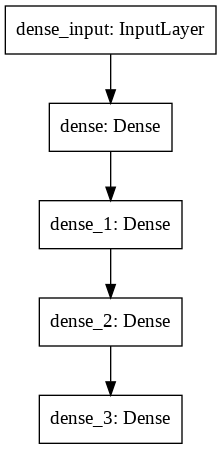

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
70/70 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.6686 - val_loss: 0.4863 - val_accuracy: 0.8977
Epoch 2/200
70/70 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.9429 - val_loss: 0.1719 - val_accuracy: 0.9716
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 0.9857 - val_loss: 0.0670 - val_accuracy: 0.9886
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9971 - val_loss: 0.0297 - val_accuracy: 0.9886
Epoch 5/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9986 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 6/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9943
Epoch 7/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 8/200
7

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 2.7106e-07 - accuracy: 1.0000


[2.7106125344289467e-07, 1.0]

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_pred

array([[1.00000000e+00],
       [1.00000000e+00],
       [4.26793417e-38],
       [1.71461272e-25],
       [1.80880288e-18],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.14853862e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.38865708e-20],
       [1.00000000e+00],
       [7.04142743e-34],
       [1.00000000e+00],
       [1.72594074e-31],
       [3.14478226e-22],
       [1.42402207e-30],
       [1.00000000e+00],
       [4.02197109e-25],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.22658420e-24],
       [2.41958662e-26],
       [1.26022961e-28],
       [1.00000000e+00],
       [8.38955485e-38],
       [4.70647595e-29],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.35097338e-27],
       [8.16583033e-19],
       [4.22683058e-22],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.06008963e-19],
       [1.47419864e-16],
       [1.00000000e+00],


In [ ]:
predicted = [1 if x >= 0.5 else 0 for x in y_pred]

In [ ]:
predicted

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
